### Making ROC curve for assessing model predictive preformance 

#### Abu Saleh Mosa Faisal
#### Graduate Student Researcher

The ROC curve summarizes the prediction performance of a classification model at all classification thresholds. Particularly, the ROC curve plots the False Positive Rate (FPR) on the X-axis and the True Positive Rate (TPR) on the Y-axis.

$\text{TPR (Sensitivity)} = \frac{TP}{TP + FN}$

$\text{FPR (1 - Specificity)} = \frac{FP}{TN + FP}$

### Preparing synthetic dataset

In [2]:
from sklearn.datasets import make_classification

In [3]:
import numpy as np

In [4]:
X, Y = make_classification(n_samples=2000, n_classes=2, n_features=10, random_state=0)

#### Adding noise to make data more complex

In [5]:
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [6]:
X

array([[ 1.59436569,  1.03078626,  0.30247354, ...,  0.15843385,
        -1.14190142, -1.31097037],
       [ 2.72008521, -1.26597863,  0.1496603 , ..., -0.03057244,
         1.57708821, -0.8128021 ],
       [ 0.29445741, -1.26003514,  0.72045153, ..., -0.53788475,
         0.39344443,  0.28651827],
       ...,
       [-0.83451804, -1.20244172,  0.16179069, ..., -0.01409412,
         1.28756456, -0.6953778 ],
       [ 1.3447604 , -1.22572926, -0.01121416, ...,  0.90499929,
         0.51428298,  0.72148202],
       [ 0.43037416, -1.25893395,  1.42065476, ..., -1.12554283,
         0.95170926, -1.15237806]])

In [7]:
X.shape

(2000, 2010)

#### Data splitting

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=0)

### Building Classification model

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#### Random Forest

In [11]:
rf = RandomForestClassifier(max_features=5, n_estimators=500)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_features=5, n_estimators=500)

#### Naive Bayes

In [12]:
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

#### Prediction Probabilities

In [13]:
r_probs = [0 for _ in range(len(Y_test))]
rf_probs = rf.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)

In [14]:
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]

In [15]:
rf_probs

array([0.492, 0.476, 0.508, 0.446, 0.556, 0.524, 0.532, 0.532, 0.496,
       0.514, 0.494, 0.43 , 0.54 , 0.498, 0.492, 0.452, 0.502, 0.556,
       0.51 , 0.502, 0.492, 0.542, 0.47 , 0.506, 0.434, 0.55 , 0.488,
       0.506, 0.526, 0.464, 0.534, 0.488, 0.486, 0.486, 0.466, 0.524,
       0.516, 0.428, 0.506, 0.544, 0.5  , 0.462, 0.512, 0.488, 0.518,
       0.53 , 0.548, 0.48 , 0.532, 0.532, 0.468, 0.448, 0.46 , 0.536,
       0.55 , 0.512, 0.468, 0.486, 0.488, 0.53 , 0.538, 0.548, 0.494,
       0.546, 0.502, 0.52 , 0.604, 0.466, 0.462, 0.49 , 0.534, 0.514,
       0.474, 0.54 , 0.576, 0.488, 0.468, 0.542, 0.514, 0.456, 0.478,
       0.516, 0.554, 0.534, 0.484, 0.486, 0.454, 0.484, 0.518, 0.526,
       0.5  , 0.5  , 0.476, 0.468, 0.516, 0.46 , 0.446, 0.474, 0.534,
       0.494, 0.518, 0.49 , 0.5  , 0.562, 0.524, 0.536, 0.502, 0.482,
       0.496, 0.492, 0.492, 0.506, 0.55 , 0.5  , 0.514, 0.558, 0.476,
       0.452, 0.488, 0.468, 0.49 , 0.488, 0.522, 0.508, 0.5  , 0.524,
       0.508, 0.488,

#### Computing AUROC (Area Under ROC) and ROC Curve

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score

In [17]:
r_auc = roc_auc_score(Y_test, r_probs)
rf_auc = roc_auc_score(Y_test, rf_probs)
nb_auc = roc_auc_score(Y_test, nb_probs)

### Print AUROC scores

In [19]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.901
Naive Bayes: AUROC = 0.993


#### Calculate ROC 

In [20]:
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(Y_test, nb_probs)

### Plot the ROC Curve

In [21]:
import matplotlib.pyplot as plt

In C:\Users\afais\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\afais\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\afais\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\afais\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\afais\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

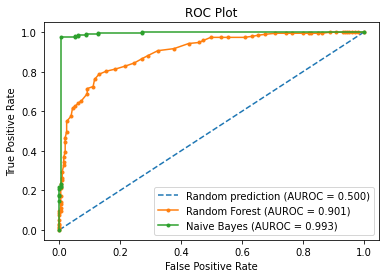

In [22]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

ROC curve is an important tool for model predictive efficiency measurement. 

In [23]:
! ls -l

total 7528
-rw-r--r-- 1 afais afais   46067 Aug 21 22:05 Compare Machine Learning Classifires.ipynb
-rw-r--r-- 1 afais afais 3666346 Aug 22 00:46 Hyperparameters tunning for ML Models.ipynb
-rw-r--r-- 1 afais afais   73124 Aug 22 02:04 Linear Regression Model.ipynb
-rw-r--r-- 1 afais afais 3848923 Aug 22 16:42 Principal Component Analysis.ipynb
-rw-r--r-- 1 afais afais   44693 Aug 23 13:32 Receiver Operating Charateristics (ROC) .ipynb
-rw-r--r-- 1 afais afais   16423 Aug 19 15:53 iris-classification-random-forest.ipynb


#### Save ROC plots

In [24]:
from IPython.display import Image, display

In [25]:
plt.savefig('roc.pdf')

<Figure size 432x288 with 0 Axes>

In [26]:
plt.savefig('roc.png')

<Figure size 432x288 with 0 Axes>

In [27]:
! ls -l

total 7536
-rw-r--r-- 1 afais afais   46067 Aug 21 22:05 Compare Machine Learning Classifires.ipynb
-rw-r--r-- 1 afais afais 3666346 Aug 22 00:46 Hyperparameters tunning for ML Models.ipynb
-rw-r--r-- 1 afais afais   73124 Aug 22 02:04 Linear Regression Model.ipynb
-rw-r--r-- 1 afais afais 3848923 Aug 22 16:42 Principal Component Analysis.ipynb
-rw-r--r-- 1 afais afais   44693 Aug 23 13:32 Receiver Operating Charateristics (ROC) .ipynb
-rw-r--r-- 1 afais afais   16423 Aug 19 15:53 iris-classification-random-forest.ipynb
-rw-r--r-- 1 afais afais    1247 Aug 23 13:33 roc.pdf
-rw-r--r-- 1 afais afais    1257 Aug 23 13:33 roc.png
